In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import os
import certifi

In [2]:
os.environ['SSL_CERT_FILE'] = certifi.where()
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/suhas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def remove_stopwords(text):
    # Tokenize the input text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [4]:
def calculate_cosine_similarity(string1, string2):
    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()
    string1 = remove_stopwords(string1)
    string2 = remove_stopwords(string2)
    # Fit and transform the vectorizer on the given strings
    tfidf_matrix = vectorizer.fit_transform([string1, string2])

    # Calculate the cosine similarity between the two vectors
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

    return cosine_sim


In [5]:
def read_csv_file(file_path):
    data = pd.read_csv(file_path)
    return data


file_path = 'Baseline.csv'
csv_data = read_csv_file(file_path)


In [6]:
def calculate_score (response):
    score_list = []
    for iter,rows in csv_data.iterrows():
        scores = []
        for i in range(1,11):
            scores.append(calculate_cosine_similarity(rows['Response' + str(response)], rows['Response' + str(i)]))
        score_list.append(scores)
        
        
    averages = [sum(values) / len(score_list) for values in zip(*score_list)]

    x_values = range(1, len(averages) + 1)

    plt.plot(x_values, averages, label="Averages")

    plt.xlabel("Response Number")
    plt.ylabel("Similarity")
    plt.title("Graph of similarity of response"+str(response)+" with other responses")

    plt.legend()
    plt.show()

In [ ]:
#The graph below show the similarity between Response 1 and other responses given by GPT for the same prompt

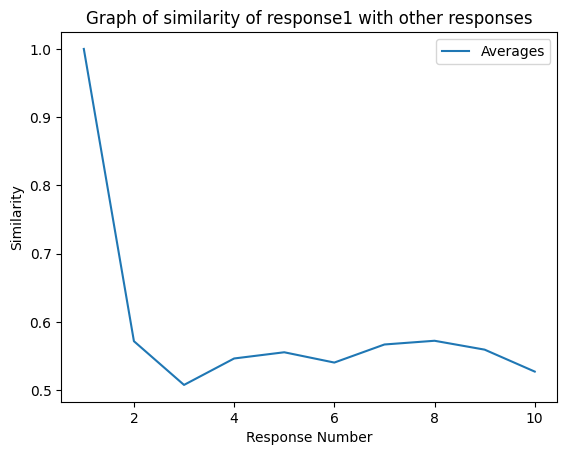

In [7]:
calculate_score(1)

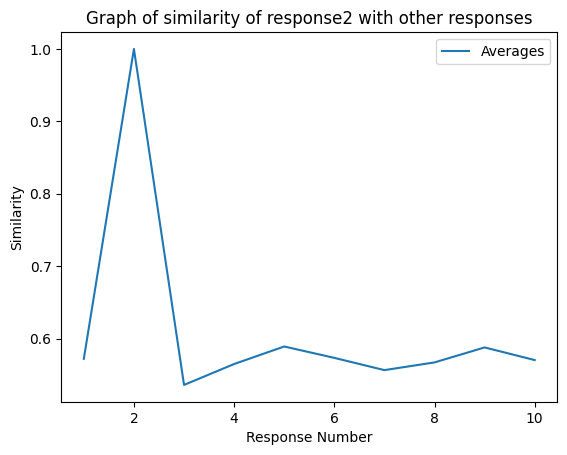

In [8]:
calculate_score(2)

In [11]:
def calculate_term_score(term):
    score_list2 = []
    for i in range (0,5):
        scores = []
        for j in range (1,11):
            scores.append (calculate_cosine_similarity(csv_data['Response'+str(j)][term],csv_data['Response'+str(j)][i]))
        score_list2.append(scores)
    averages = [sum(lst) / len(lst) for lst in score_list2]
    # x-axis values (indices of the list)
    x = range(1, len(averages) + 1)

    # Plotting the values
    plt.plot(x, averages, marker='o')

    # Adding labels and title
    plt.xlabel('Prompt Number')
    plt.ylabel('Similarity')
    plt.title('Graph of similarity of response generated by prompt'+str(term+1)+' with other prompts')

    # Displaying the plot
    plt.show()

In [ ]:
#The below graphs shows the similarity of the responses given by all the prompts

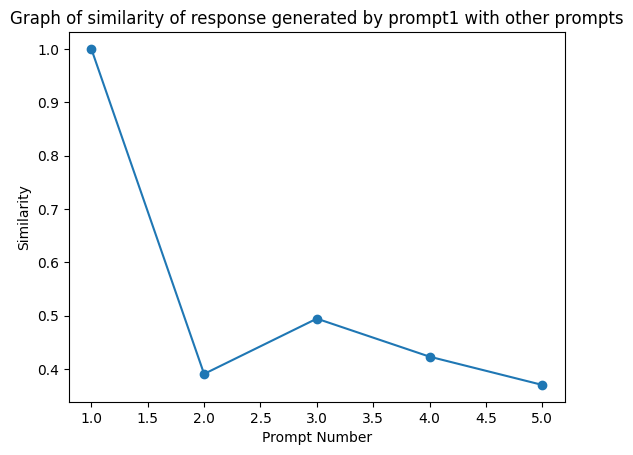

In [12]:
calculate_term_score(0)

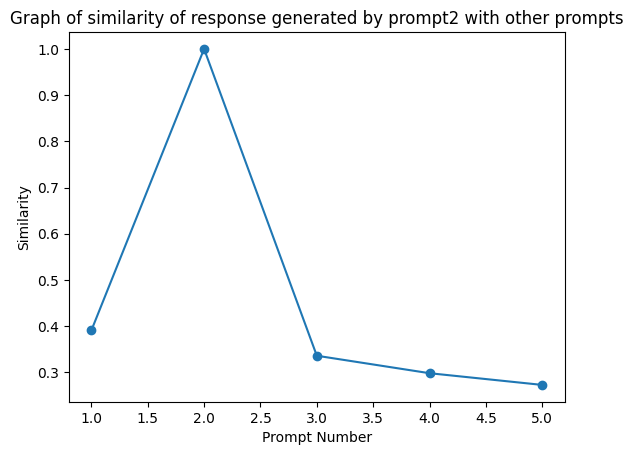

In [13]:
calculate_term_score(1)

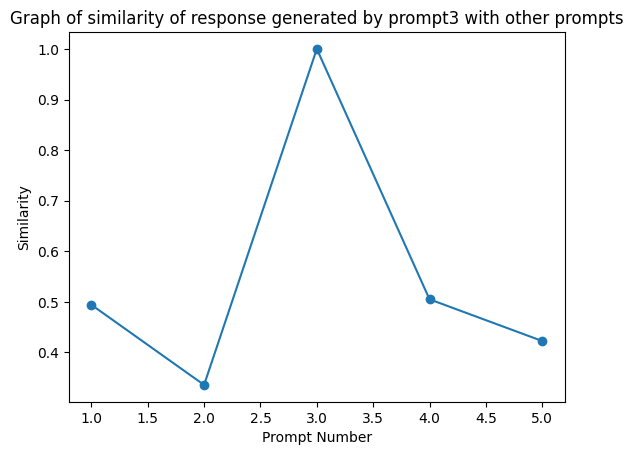

In [14]:
calculate_term_score(2)

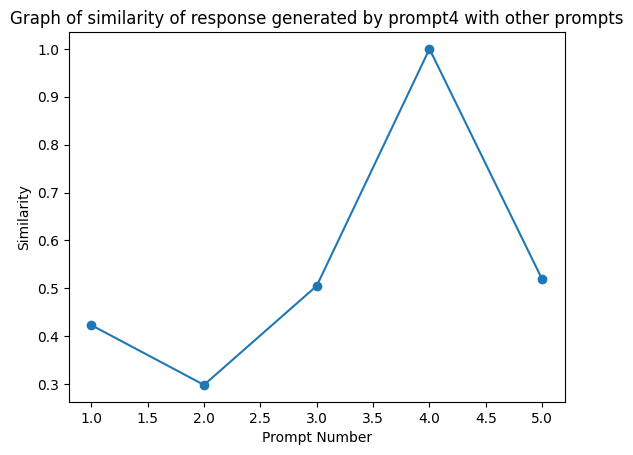

In [15]:
calculate_term_score(3)

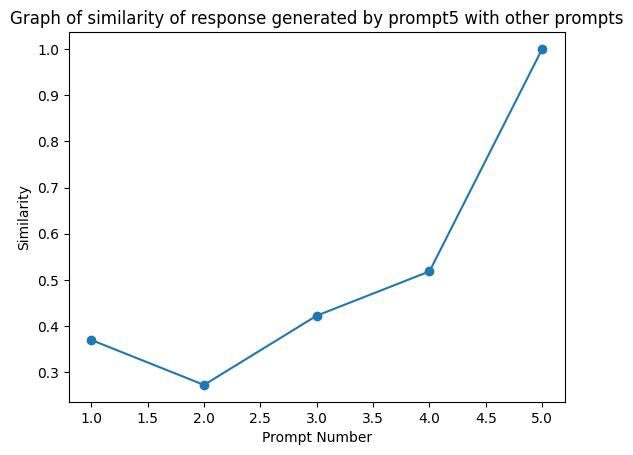

In [16]:
calculate_term_score(4)

In [20]:
file_path = 'Baseline.csv'
Baseline_data = read_csv_file(file_path)
file_path = 'Creative_Innovative.csv'
Creative_data = read_csv_file(file_path)
file_path = 'Without_Income.csv'
without_income_data = read_csv_file(file_path)
file_path = 'Region_Specific.csv'
Region_data = read_csv_file(file_path)

In [89]:
def cross_score():
    
    score = []
    for j in range (0,5):
        scores_1 = []
        scores_2 = []
        scores_3 = []
        for i in range (1,11):
            scores_1.append(calculate_cosine_similarity(Baseline_data['Response'+str(i)][j],without_income_data['Response'+str(i)][j]))  
            scores_2.append(calculate_cosine_similarity(Baseline_data['Response'+str(i)][j],Region_data['Response'+str(i)][j]))
            scores_3.append(calculate_cosine_similarity(Baseline_data['Response'+str(i)][j],Creative_data['Response'+str(i)][j]))
        score.append([sum(scores_1)/len(scores_1),sum(scores_2)/len(scores_2),sum(scores_3)/len(scores_3)])
    labels = ['Baseline vs Without income', 'Baseline vs Region', 'Baseline vs Creative']
    df = pd.DataFrame(score, columns=labels)
    prompt_labels = ['prompt 1', 'prompt 2', 'prompt 3', 'prompt 4', 'prompt 5']
    df = pd.DataFrame(score, columns=labels)
    ax = df.plot(kind='bar')
    
    ax.set_ylabel('Values')
    ax.set_title('Bar Graph by Group')
    
    # Set custom x-axis labels using xticks
    ax.set_xticks(range(len(prompt_labels)))
    ax.set_xticklabels(prompt_labels)
    
    ax.legend(title='Groups')
    ax.legend(title='Groups', bbox_to_anchor=(1.25, 1.15), loc='upper center')








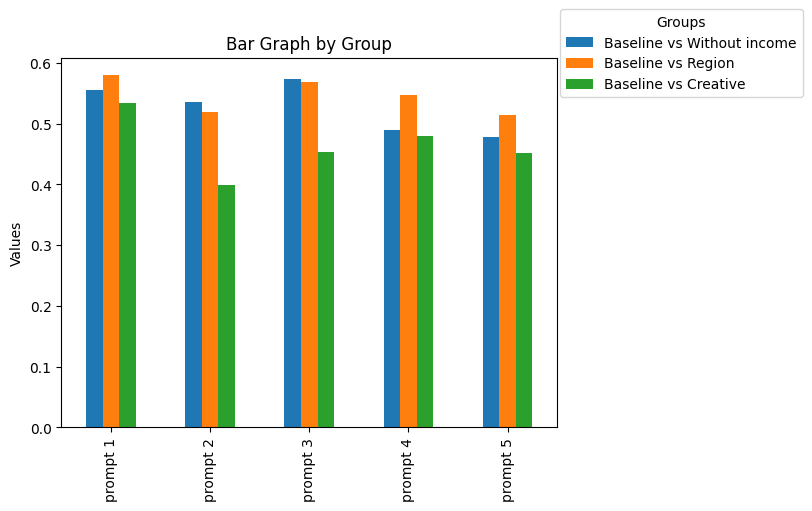

In [90]:
cross_score()

